# TTT4185 Machine learning for Speech technology

## Computer assignment 2: Classification using the Bayes Decision Rule and Support Vector Machines

This assignment assumes that the student has knowledge about the Bayes Decision Rule, maximum likelihood estimation and support vector machines.

In this assignment we will use `scikit-learn` (http://scikit-learn.org/stable/), which is a powerful and very popular Python toolkit for data analysis and machine learning, and `pandas` (https://pandas.pydata.org), which implements the all-powerful `DataFrame`.

We will also be using a small database of phonemes, where each phoneme is represented by the four first formant positions ("F1"-"F4") and their corresponding bandwidths ("B1"-"B4"). All numbers are in kHz. In addition, the speaker ID and the gender of the speaker are given for each phoneme.

In [16]:
!pip install -U scikit-learn

In [17]:
!pip install pandas

### Problem 1

In this problem we will use the Bayes decision rule to classify vowels based on their formants. The formants have been extracted from the open database `VTR Formants database` (http://www.seas.ucla.edu/spapl/VTRFormants.html) created by Microsoft and UCLA.

#### (a) Download the files `Train.csv` and `Test.csv` from Blackboard, and load them into a `pandas` dataframe using the command `pd.read_csv`. Using the training data, create a single scatter plot of "F1" vs "F2" for the three vowels
- "ae" as in "bat"
- "ey" as in "bait"
- "ux" as in "boot"

Just eyeing the plots, discuss which classes will be hardest to classify correctly.

In [18]:
# plt.style.available

     SpeakerID Gender Phoneme        F1        F2        F3        F4  \
0         elc0      F      h#  0.905573  1.738244  2.668338  3.705146   
1         elc0      F       q  0.662589  2.294984  3.031420  4.249530   
2         elc0      F      ih  0.546685  2.327745  2.940156  4.430072   
3         elc0      F       n  0.433152  1.945851  2.655110  4.270400   
4         elc0      F       w  0.490665  0.797423  2.809036  4.628589   
...        ...    ...     ...       ...       ...       ...       ...   
7136      pam0      M       z  0.310477  1.553493  2.419699  4.001645   
7137      pam0      M     dcl  0.303197  1.614552  2.418308  4.000498   
7138      pam0      M       d  0.327711  1.588264  2.398628  4.148673   
7139      pam0      M      ey  0.498319  1.664263  2.298876  4.355669   
7140      pam0      M       z  0.404878  1.622776  2.312402  4.273212   

            B1        B2        B3        B4  
0     0.249606  0.334268  0.371210  0.451931  
1     0.230553  0.415485  0.2

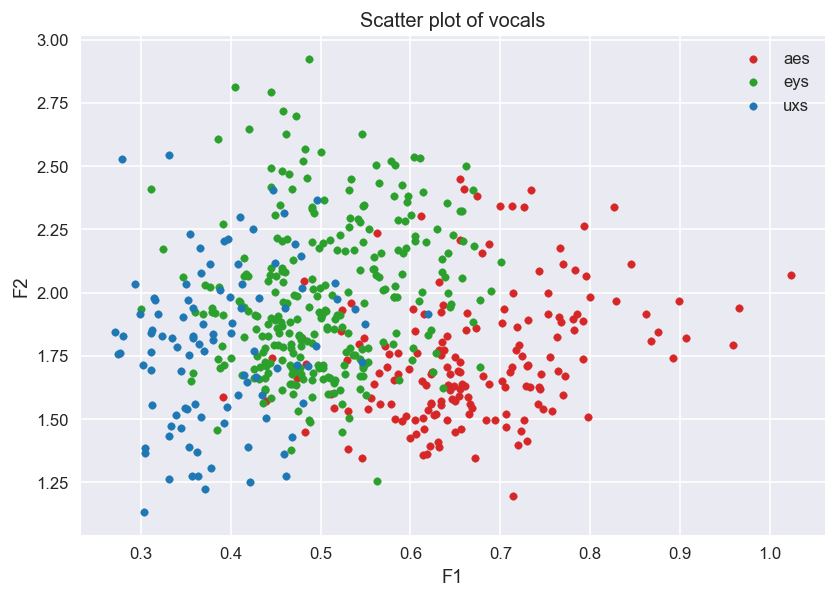

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib notebook
# %matplotlib inline

plt.style.use('seaborn')

# Load data
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

# Extract vowels
aes = train[train["Phoneme"] == 'ae']
eys = train[train["Phoneme"] == 'ey']
uxs = train[train["Phoneme"] == 'ux']

# Plotting here

# print(test)
plt.rcParams["figure.dpi"] = 120

# ax = df.plot.scatter(x="x",y="a", color="b", label="Scatter plot of vocal")

ax = aes.plot.scatter(
    x="F1", y='F2', title='Scatter plot of vocals', label="aes", c='tab:red')
eys.plot.scatter(x="F1", y='F2', ax=ax, label='eys', c='tab:green')
uxs.plot.scatter(x="F1", y='F2', ax=ax, label='uxs', c='tab:blue')

plt.show()


The less correlated the data appears the harder it is to predict?

#### (b) Use the Bayes Decision Rule to create a classifier for the phonemes 'ae', 'ey' and 'ux' under the following constraints:
- The feature vector $x$ contains the first two formants, "F1" and "F2".
- The distribution of $x$ given a phoneme $c$, $P(x|c)$, is Gaussian.
- Use the maximum likelihood estimator to estimate the model parameters.

In [88]:
# training_data = pd.DataFrame(data={'aes': aes[['F1', 'F2']], 'eys': eys[['F1', 'F2']], 'uxs': uxs[['F1', 'F2']]})

# # multi = aes.set_index(['aes', 'eys', 'eys'])

# print(multi)

# training_data = [aes[['F1', 'F2']], eys[['F1', 'F2']], uxs[['F1', 'F2']]]
training_data = {'aes': aes[['F1', 'F2']], 'eys': eys[['F1', 'F2']], 'uxs': uxs[['F1', 'F2']]}
# training_data = {'aes': aes[['F1', 'F2']].to_dict(), 'eys': eys[['F1', 'F2']].to_dict(), 'uxs': uxs[['F1', 'F2']].to_dict()}
# training_data = pd.concat([aes[['F1', 'F2']], eys[['F1', 'F2']], uxs[['F1', 'F2']]], keys=['aes', 'eys', 'uxs'], levels=[['aes', 'eys', 'uxs']], names=['vowl', 'index'], join='outer', ignore_index=True, axis=1)
# training_data = pd.concat([aes, eys, eys])

# training_data = pd.DataFrame(data=training_data)
print(training_data)

{'aes':              F1        F2
39     0.714021  1.999640
171    0.718775  1.862884
205    0.712715  2.342793
585    0.829052  1.967996
597    0.906937  1.818808
...         ...       ...
12182  0.617508  1.634245
12194  0.666529  1.559452
12285  0.654254  1.590966
12432  0.473568  1.662460
12476  0.522834  1.846401

[173 rows x 2 columns], 'eys':              F1        F2
107    0.571166  2.015187
138    0.590581  2.074329
152    0.581809  1.982820
182    0.605038  2.204604
214    0.483081  2.565800
...         ...       ...
12437  0.428297  1.854382
12457  0.501317  1.912255
12491  0.507001  1.856752
12551  0.547231  1.703629
12567  0.550797  1.594448

[283 rows x 2 columns], 'uxs':              F1        F2
83     0.479160  2.019393
88     0.460181  1.939525
319    0.474038  1.713061
516    0.458882  2.315319
569    0.486259  1.711566
...         ...       ...
11634  0.312729  1.554931
11742  0.418376  1.645457
11927  0.399661  1.841294
12347  0.434512  1.593966
12427  0.360071  1

In [174]:
# print(train)




def prep_model_from_df(dataset_of_df):
    # x = pd.DataFrame(data={'F1:': df["F1"], 'F2': df["F2"]})
    # x = df[["F1", "F2"]]
    # x = np.array([df["F1"], df["F2"]])

    # print(x)
    data_size  = 0 

    for key in dataset_of_df:
        data_size += dataset_of_df.get(key).shape[0]
    
    print(data_size)


    # col = ['mean', 'cov', 'prior']
    # model = pd.DataFrame(columns=col)
    model = {}
    for key in dataset_of_df:
        print('key: ', key)
        data = dataset_of_df.get(key)
        model[key] = {'mean': data.mean(0), 'cov': data.cov(), 'prior': data.shape[0]/data_size}
        # print("mean: ", data.mean(axis=0))
        # df = pd.DataFrame(data=temp)
        # dic = {}
        # print(dic)
        # dic[key] = 
        # model.append(df)

    return model


# prep_model_from_df(training_data)
models = prep_model_from_df(training_data)
print("model:", models.get('aes'))
# print("model:", models.get('aes').get('cov').to_numpy())


556
key:  aes
key:  eys
key:  uxs
model: {'mean': F1    0.66986
F2    1.74238
dtype: float64, 'cov':           F1        F2
F1  0.010608  0.007590
F2  0.007590  0.063172, 'prior': 0.31115107913669066}


In [92]:
aes_test = test[test["Phoneme"] == 'ae']
eys_test = test[test["Phoneme"] == 'ey']
uxs_test = test[test["Phoneme"] == 'ux']

observations = {'aes': aes_test[['F1', 'F2']], 'eys': eys_test[['F1', 'F2']], 'uxs': uxs_test[['F1', 'F2']]}

{'aes':             F1        F2
115   0.626849  2.040568
286   0.635120  2.129651
296   0.765164  1.928721
378   0.657672  1.512031
530   0.639403  2.078772
...        ...       ...
6719  0.871840  1.468683
6860  0.652087  1.519256
6978  0.673218  1.611651
7108  0.708950  1.390807
7113  0.651769  1.622842

[105 rows x 2 columns], 'eys':             F1        F2
5     0.496880  2.281662
15    0.573029  2.188101
45    0.417041  2.033501
128   0.595308  1.990928
262   0.612936  2.220185
...        ...       ...
6830  0.447298  2.042744
6846  0.323772  2.147505
6974  0.533471  1.891719
7066  0.397318  1.795865
7139  0.498319  1.664263

[114 rows x 2 columns], 'uxs':             F1        F2
47    0.486671  1.962810
62    0.534379  2.043249
212   0.517220  1.661578
537   0.314599  1.366712
820   0.291976  1.493091
958   0.526565  1.829113
1299  0.388289  1.787756
1445  0.333733  1.782382
1610  0.308781  2.015792
1665  0.506199  1.391697
1841  0.503610  1.903369
1939  0.341155  2.009025
199

In [209]:
import scipy.stats as stats

def MLE_classifier(observation_classes, models):
    predicitons = {}
    
    data_size  = 0 

    for key in observation_classes:
        data_size += observation_classes.get(key).shape[0]

    error_rate = 0

    # iterate over sets of observations with given classes as reference
    for observ_key in observation_classes:
        observation_class = observation_classes.get(observ_key)
        
        # iterate over unique observations 
        for index, observation in observation_class.iterrows():
            # print(row)
            prediciton = {}

            # iterate over and predict with given models
            for model_key in models:
                model = models.get(model_key)
                rvs = stats.multivariate_normal(mean=model.get('mean'), cov=model['cov'])
                
                prediciton[model_key] = (rvs.pdf(observation * model.get('prior')))

            # print(prediciton)
            mle_prediction = max(zip(prediciton.values(), prediciton.keys()))[1]
            # print(mle_prediction)

            predicitons[index] = {'truth': mle_prediction, 'prediction': mle_prediction}
            if(mle_prediction != observ_key):
                error_rate+=1

        # print("observation:", observation_class)
    
    error_rate = error_rate / data_size
    print('error_rate: ', error_rate)

    return pd.DataFrame(predicitons)

predictions = MLE_classifier(observations, models)

print(predictions)

error_rate:  0.5793357933579336
           115  286  296  378  530  587  598  624  755  775   ... 5375 5434  \
truth       eys  eys  eys  eys  eys  eys  eys  eys  eys  eys  ...  eys  eys   
prediction  eys  eys  eys  eys  eys  eys  eys  eys  eys  eys  ...  eys  eys   

           5498 5568 5830 6523 6746 6799 6899 7101  
truth       eys  eys  eys  eys  eys  eys  eys  eys  
prediction  eys  eys  eys  eys  eys  eys  eys  eys  

[2 rows x 271 columns]


#### testing 

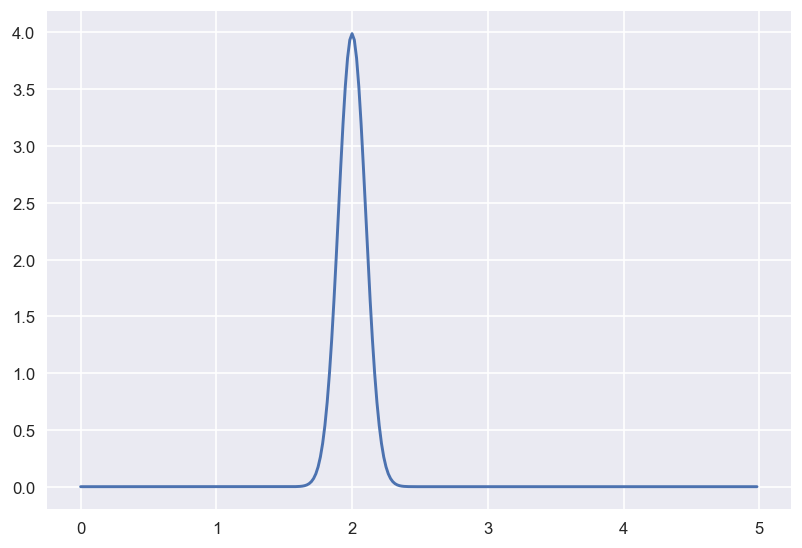

In [107]:
x = np.linspace(0, 5, 300, endpoint=False)
y = stat.multivariate_normal.pdf(x, mean=2, cov=0.01)

fig1 = plt.figure()
ax = fig1.add_subplot(111)
ax.plot(x, y)

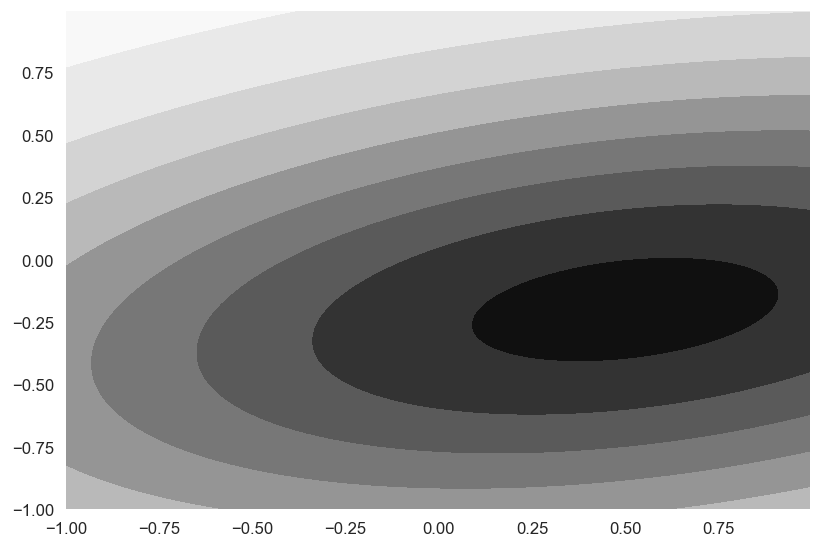

In [137]:
x, y = np.mgrid[-1:1:.005, -1:1:.005]
pos = np.dstack((x, y))
rv = stat.multivariate_normal([0.5, -0.2], [[2.0, 0.3], [0.3, 0.5]])
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(x, y, rv.pdf(pos))

In [21]:
df1 = pd.DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'],
        columns=['one', 'two'])
df2 = pd.DataFrame(5 + np.arange(4).reshape(2, 2), index=['a', 'c'],
        columns=['one', 'two'])


res = pd.concat([df1, df2], axis=1,
                keys=['level1','level2'], 
                levels=[['level1', 'level2','level3']])
print(res.keys)
print(res['level1'])

# for e in res:
#         print(e)
        # print(res[e[0]])

<bound method NDFrame.keys of   level1     level2     
     one two    one  two
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0>
   one  two
a    0    1
b    2    3
c    4    5


In [22]:
dic = {"class1": {"mean": 1, "var": 2}, "class2": {"mean": 1, "var": 2}}

print(dic)

test = pd.DataFrame(data=dic)
print(test)

{'class1': {'mean': 1, 'var': 2}, 'class2': {'mean': 1, 'var': 2}}
      class1  class2
mean       1       1
var        2       2


#### (c) To visualize the classes models and the classifier created in (b), plot the contours for each Gaussian distribution in the model, that is the class conditional likelihoods $P(x|c)$, by using the following function.

In [204]:
def plotGaussian(mean, cov, color, ax):
    """ 
        Creates a contour plot for a bi-variate normal distribution

        mean: numpy array 2x1 with mean vector
        cov: numpy array 2x2 with covarince matrix
        color: name of color for the plot (see https://matplotlib.org/stable/gallery/color/named_colors.html)
        ax: axis handle where the plot is drawn (can for example be returned by plt.gca() or plt.subplots())
    """
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    x, y = np.mgrid[xlim[0]:xlim[1]:(
        xlim[1]-xlim[0])/500.0, ylim[0]:ylim[1]:(ylim[1]-ylim[0])/500.0]
    xy = np.dstack((x, y))
    mvn = stats.multivariate_normal(mean, cov)
    lik = mvn.pdf(xy)
    ax.contour(x, y, lik, colors=color)


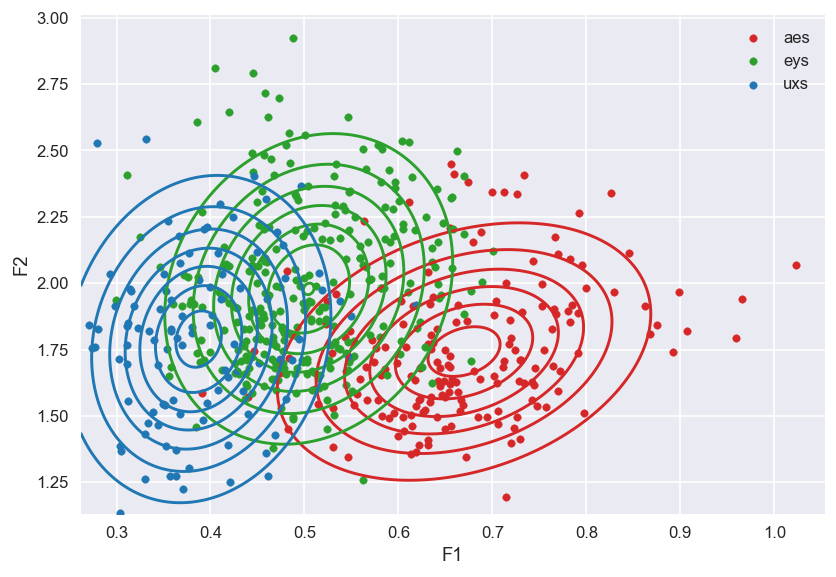

In [206]:

colors = {'aes': 'tab:red','eys': 'tab:green', 'uxs': 'tab:blue'}


fig, ax = plt.subplots()

for key in models:
    model = models.get(key)
    data = training_data.get(key)
    # print(model.get('mean'))
    # print(model.get('cov'))
    # ScatterPlot(model.get('mean'), model.get('cov'), colors.get(key), ax)

    data.plot.scatter(x="F1", y='F2', ax=ax, label=key, c=colors.get(key))

    plotGaussian(model.get('mean'), model.get('cov'), colors.get(key), ax)
    
plt.show()

*Try:* Plot the decision regions for the Bayesian classifier. Tips: Calculate the posterior for each class, use the `numpy.argmax` function to get the decision regions, and `matplotlib.pyplot.contourf` to plot them.

#### (d) Test your classifier on the 'ae', 'ey' and 'ux' phonemes from the test set and present your results in a _confusion matrix_, that is, a table where you see how many times 'ae' was correctly classified, how many times it was wrongly classified as 'ey' and so on.

#### (e) Extend your classifier to include the features "F1"-"F4" and compare the results with those in (d). Finally use all available information "F1"-"F4" and "B1-B4". How does the performance of this classifier compare with the simpler classifiers using fewer features?

#### (f) We want to make the model slightly more powerful by modeling the feature vector conditional on both the vowel and gender of speaker, that is $P(x|g,c)$, where $g$ is the gender of the speaker and $c$ is the phoneme label. Show how these models can be used for phoneme classification using marginalization over the gender.

Assume that $P(x|g,c)$ is a multivariate Gaussian and compute the maximum likelihood estimates for the models. Compare the result on the test set with the results in (e).

#### (g) When using Gaussian classifiers we often avoid computing the entire covariance matrix, but instead we only use the diagonal of the matrix. Repeat the results in (f) using only diagonal covariance matrices and compare the results.

### Problem 2

In this problem we use the support vector machine (SVM) to build classifiers. We use the same dataset as in Problem 1. It is up to you to select which features to use.

We use the function `sklearn.svm.SVC` from `scikit-learn` in this problem. First you need to get your data on the format that `SVC` expects, which is a matrix where every row is a feature vector, and a list of integer labels corresponding to each row. We suggest using "ae" = 0, "ey" = 1 and "ux" = 2.

An example on how to use the `SVC` is given in http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC. In short, we do the following (for a linear kernel):
- Instantiate an SVC object: `cls = SVC(kernel='linear')`
- Train the SVM using the feature vector matrix `train_X`, and label vector `train_Y`: `cls.fit(train_X, train_Y)`
- Predict labels on the test set `Test_X` using: `cls.predict(Test_X)`

You can use or adapt the following functions to visualize the SVM decision regions and support vectors in 2D.

In [24]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

def Plot_SVM_decision_regions(clf,data,labels):
    '''
    This function is for plotting the decision area of SVM
    
    Args:
    - clf: SVM model
    - data: Data with two features
    - labels: Corresponding labels of the data
    '''
    phonemes = np.array(["ae","ey","ux"])
    x_min, x_max = data[:,0].min() - 0.2, data[:,0].max() + 0.2
    y_min, y_max = data[:,1].min() - 0.2, data[:,1].max() + 0.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.002),np.arange(y_min, y_max, 0.002))
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(phonemes)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = label_encoder.transform(Z)
    Z = Z.reshape(xx.shape)
    #Plotting
    plt.figure(figsize=(10,6))
    sns.scatterplot(data[:,0],data[:,1],hue=labels)
    plt.contourf(xx, yy, Z, cmap=plt.cm.ocean, alpha=0.2)
    plt.legend()
    plt.title('Decision Area of SVM')
    plt.show()

def Plot_Support_Vectors(clf,data):
    '''
    This function is for plotting the support vectors of the SVM model
    
    Args:
    - clf: SVM model
    - data: Data with two features
    '''
    x_min, x_max = data[:,0].min() - 0.2, data[:,0].max() + 0.2
    y_min, y_max = data[:,1].min() - 0.2, data[:,1].max() + 0.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.002),np.arange(y_min, y_max, 0.002))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = label_encoder.transform(Z)
    Z = Z.reshape(xx.shape)
    #Plotting
    plt.figure(figsize=(10,6))
    plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], c='k',alpha=0.4,label='support vector')
    plt.contourf(xx, yy, Z, cmap=plt.cm.ocean, alpha=0.2)
    plt.legend()
    plt.title('Support Vectors')
    plt.show()

#### (a) Create a linear SVM with different penalty terms $C=\{0.1, 1, 10\}$ and compare with the results in Problem 1.

#### (b) Try different kernels ('rbf', 'poly', 'sigmoid') and compare the results. Choose one of the kernels and use different penalty terms $C$. What happens with the performance on the training set when you increase $C$? What happens with the performance on the test set?